In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Read the CSV file
df=pd.read_csv(r"C:\Users\232339\Desktop\Diwali_Sales Analytics_Python\Data\Diwali Sales Data.csv")
print(df)

       User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

                State      Zone       O

Take a Look at Data

What it is:
Using df.head() to display the first few rows of the dataset.

Why we use it:
To get a quick preview of the data, understand column names, and check if the data has been loaded correctly.

In [4]:
# Display the first few rows
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


Dataset Rows & Columns Count

What it is:
Checking the number of rows and columns in the dataset using df.shape.

Why we use it:
To understand the size and dimensions of the dataset, which helps in planning the analysis and knowing how much data we are dealing with.

In [5]:
# Dataset Rows & Columns count
df.index

RangeIndex(start=0, stop=11251, step=1)

In [6]:
# Getting Information of total Column & Rows
df.shape

(11251, 15)

In [7]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

Getting Dataset Information

What it is:
Using df.info() to get details about column names, data types, non-null counts, and memory usage.

Why we use it:
To quickly identify data types, missing values, and overall structure of the dataset, which helps in planning data cleaning and analysis steps.

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


Duplicate Values
What it is:
Checking for duplicate rows in the dataset using df.duplicated().value_counts().

Why we use it:
To identify and remove duplicate records, ensuring that analysis and insights are accurate and not skewed by repeated data.

In [10]:
duplicate_values=df.duplicated().value_counts
duplicate_values

<bound method IndexOpsMixin.value_counts of 0        False
1        False
2        False
3        False
4        False
         ...  
11246    False
11247    False
11248    False
11249    False
11250    False
Length: 11251, dtype: bool>

2. Data Cleaning & Data Wrangling
What it is:
The process of handling missing values, removing duplicates, correcting data types, and dropping unnecessary columns to make the dataset consistent and analysis-ready.

Why we use it:
Clean data ensures accurate, reliable, and meaningful analysis. Without cleaning, insights may be incorrect or misleading.

Drop Columns
What it is:
Removing unnecessary or irrelevant columns from the dataset using df.drop().

Why we use it:
To simplify the dataset, reduce clutter, and focus only on the columns that are important for analysis

In [11]:
# Drop columns with all null values
df.drop(columns=['Status', 'unnamed1'], inplace=True)

In [12]:
# Check Current Columns
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

Fill Missing Amount Values

What it is:
Replacing missing values in the Amount column using methods like fillna() with median or zero.

Why we use it:
To ensure that sales calculations and analysis are accurate, since missing values can skew totals, averages, and other insights.

In [13]:
# Fill missing Amount values with 0 or median
df['Amount'] = df['Amount'].fillna(df['Amount'].median())

In [14]:
# Missing Values/Null Values Count
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

Rename Columns to Remove Spaces

What it is:
Renaming columns (e.g., 'Age Group' → 'Age_Group') using df.rename() to remove spaces.

Why we use it:
To make column names easier to reference in code, avoid syntax errors, and improve readability during analysis.

In [15]:
# Rename columns to remove spaces for easier coding
df.rename(columns={'Age Group':'Age_Group'}, inplace=True)

In [16]:
# Check Current Columns
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

Check & Drop Duplicate Records

What it is:
Identifying duplicate rows using df.duplicated() and removing them with df.drop_duplicates().

Why we use it:
To ensure that each transaction is unique, preventing inflated counts or skewed analysis results caused by repeated data.

In [17]:
#Check Duplicate Records
df.duplicated().value_counts()

False    11243
True         8
Name: count, dtype: int64

In [18]:
# Drop Duplicate Records
df.drop_duplicates(inplace=True)

Verify Data After Cleaning

What it is:

Checking the dataset after cleaning using df.info(), df.shape, and df.head() to ensure all issues are resolved.

Why we use it:

To confirm that missing values are handled, duplicates are removed, and columns are correctly formatted, making the dataset fully ready for analysis

In [19]:
# Verify Data After Cleaning

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 11243 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11243 non-null  int64  
 1   Cust_name         11243 non-null  object 
 2   Product_ID        11243 non-null  object 
 3   Gender            11243 non-null  object 
 4   Age_Group         11243 non-null  object 
 5   Age               11243 non-null  int64  
 6   Marital_Status    11243 non-null  int64  
 7   State             11243 non-null  object 
 8   Zone              11243 non-null  object 
 9   Occupation        11243 non-null  object 
 10  Product_Category  11243 non-null  object 
 11  Orders            11243 non-null  int64  
 12  Amount            11243 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


(11243, 13)

Final Dataset Preview

What it is:
Displaying the first few rows of the cleaned dataset using df.head().

Why we use it:
To visually inspect the cleaned data, verify column names, data types, and sample values before starting detailed analysis.

In [20]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age_Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


After Data Cleaning – Dataset Overview

After exploring and cleaning the Diwali Sales dataset, we gained the following insights about its structure and quality:

The dataset contains 11,243 unique records and 13 relevant features after cleaning.
There are no missing values in any column, making the dataset reliable for analysis.

The data includes both:

Numerical variables: Age, Orders, Amount

Categorical variables: Gender, Age Group, State, Zone, Occupation, Product Category

Each row represents a customer purchase transaction during the Diwali festive season.
Customer demographic information such as age, gender, marital status, and occupation is available.
Sales-related details include number of orders and total purchase amount.
Regional information like state and zone helps analyze geographical sales patterns.
Overall, the dataset is clean, consistent, and analysis-ready, making it suitable for exploratory data analysis and business insight generation.

3. Understanding Your Variables

What it is:

Examining each column to understand the type of data it holds (numerical or categorical) and what it represents in the context of the project.

Why we use it:

To ensure we know what each variable means, decide which type of analysis or visualization is appropriate, and prepare for meaningful insights.

In [21]:
# Dataset Columns
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [22]:
# Dataset Describe
df.describe(include='all')

,User_ID,Cust_name,Product_ID,Gender,Age_Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
count,1.124300e+04,11243,11243,11243,11243,11243.000000,11243.000000,11243,11243,11243,11243,11243.000000,11243.000000
unique,NaN,1250,2351,2,7,NaN,NaN,16,5,15,18,NaN,NaN
top,NaN,Vishakha,P00265242,F,26-35,NaN,NaN,Uttar Pradesh,Central,IT Sector,Clothing & Apparel,NaN,NaN
freq,NaN,42,53,7838,4538,NaN,NaN,1944,4294,1586,2653,NaN,NaN
mean,1.003005e+06,NaN,NaN,NaN,NaN,35.422841,0.420261,NaN,NaN,NaN,NaN,2.488749,9452.649331
std,1.716141e+03,NaN,NaN,NaN,NaN,12.756369,0.493623,NaN,NaN,NaN,NaN,1.114960,5219.125950
min,1.000001e+06,NaN,NaN,NaN,NaN,12.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,188.000000
25%,1.001494e+06,NaN,NaN,NaN,NaN,27.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,5444.000000
50%,1.003065e+06,NaN,NaN,NaN,NaN,33.000000,0.000000,NaN,NaN,NaN,NaN,2.000000,8109.000000
75%,1.004430e+06,NaN,NaN,NaN,NaN,43.000000,1.000000,NaN,NaN,NaN,NaN,3.000000,12672.000000


# Data  Visualization

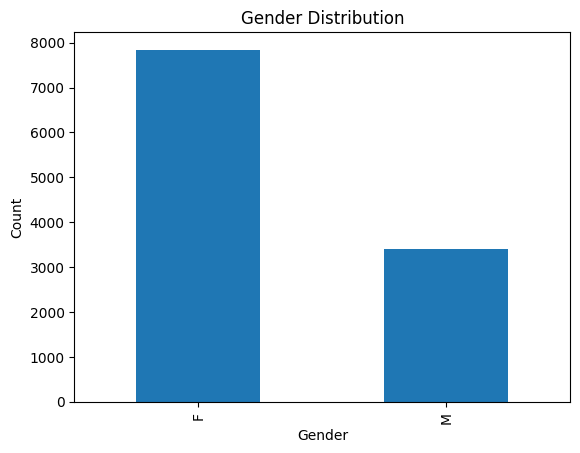

In [5]:
# Gender distribution
df['Gender'].value_counts().plot(kind='bar')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

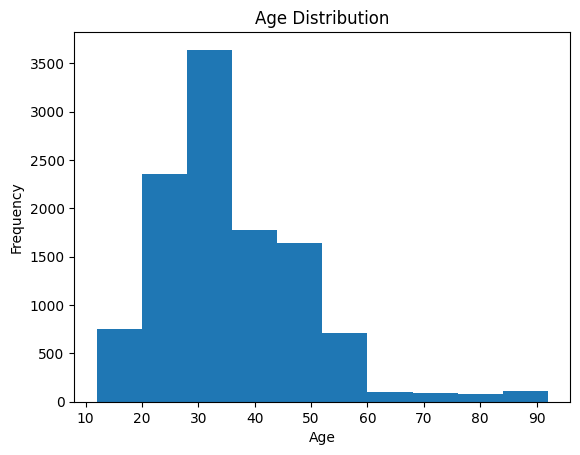

In [6]:
# Age distribution
plt.hist(df['Age'])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

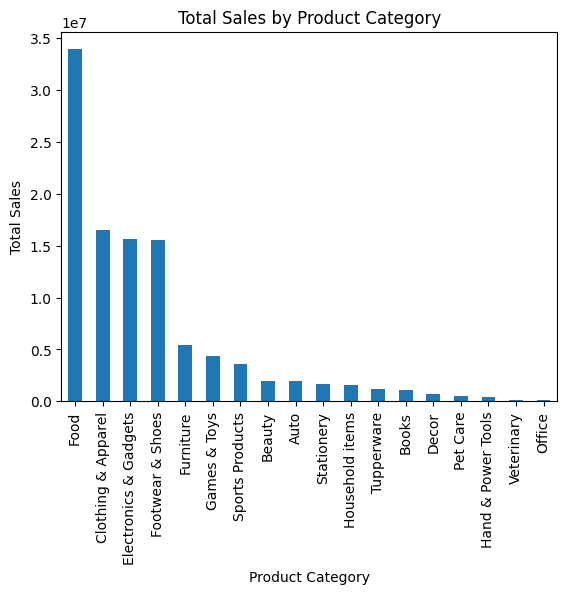

In [7]:
# Total sales by product category
sales_by_category = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False)
sales_by_category.plot(kind='bar')
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.show()

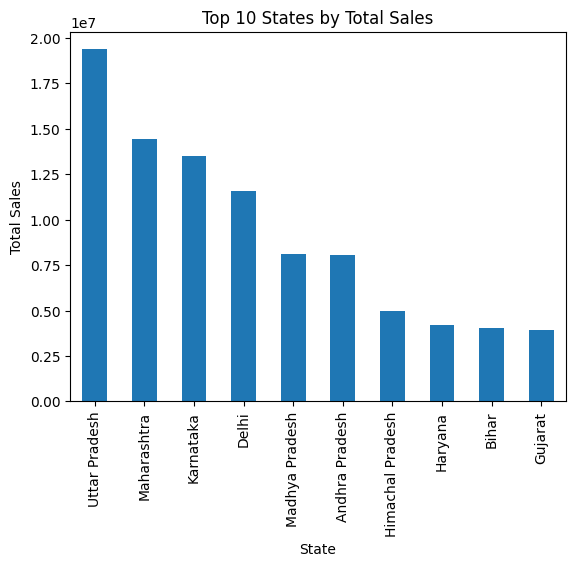

In [8]:
state_sales = df.groupby("State")["Amount"].sum().sort_values(ascending=False).head(10)

plt.figure()
state_sales.plot(kind="bar")
plt.title("Top 10 States by Total Sales")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.show()

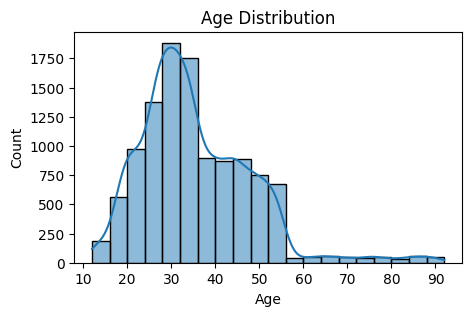

In [9]:

plt.figure(figsize=(5,3))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

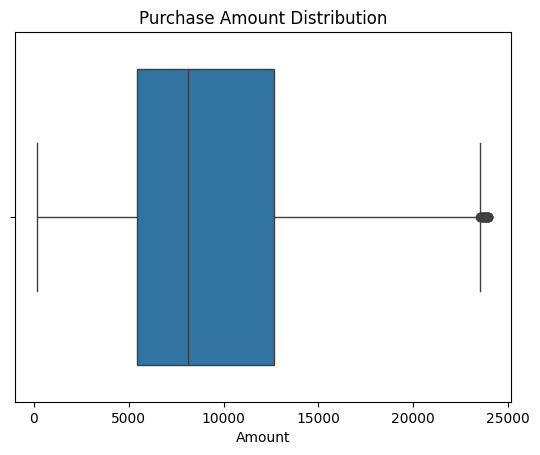

In [10]:
sns.boxplot(x=df['Amount'])
plt.title("Purchase Amount Distribution")
plt.show()


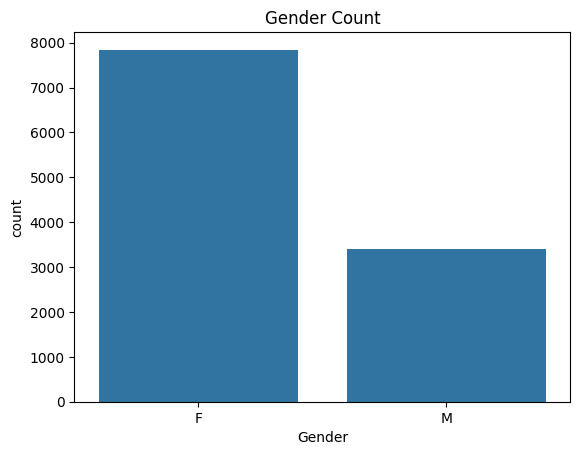

In [11]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Count")
plt.show()
